In [ ]:
!pip install sweetviz

# Preparando o drive e o arquivo

In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sweetviz as sv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stack/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# EDA

In [ ]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Dataset classification

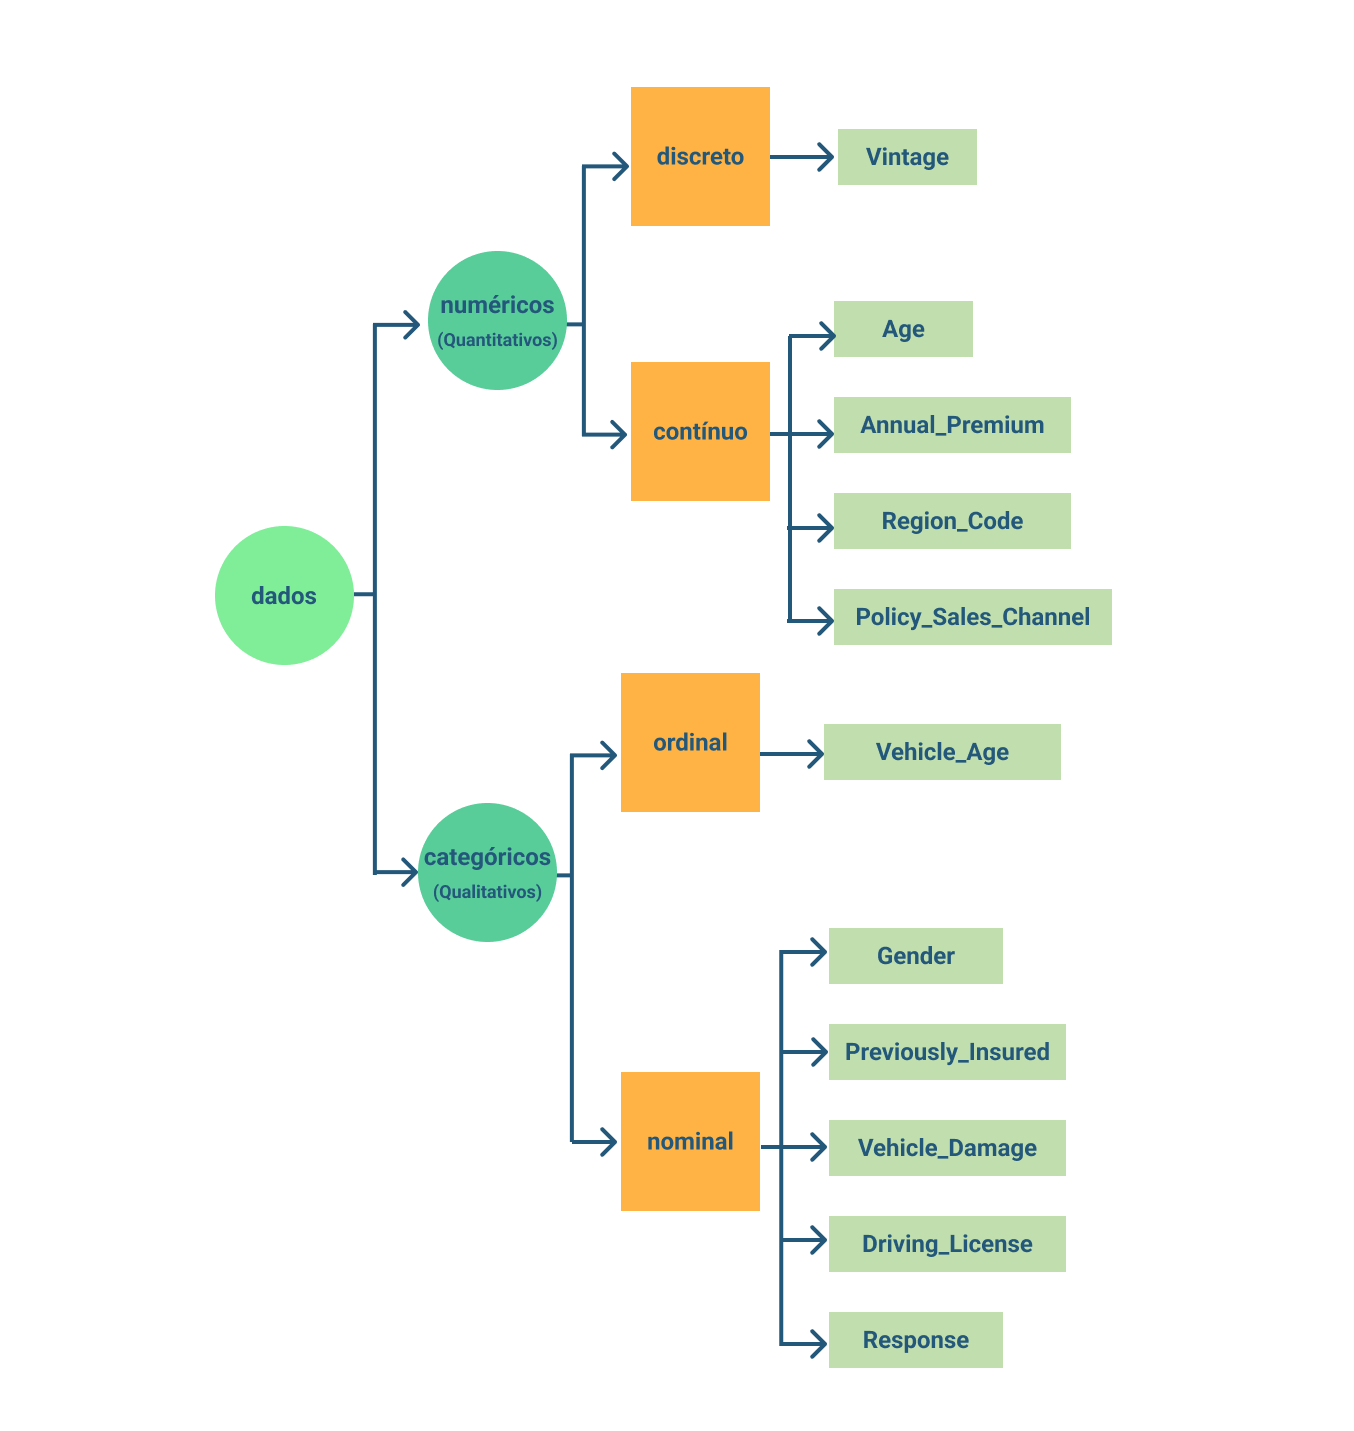

## Dataset statistics

In [ ]:
#checking NaN values
#we don't have NaN values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#checking stats
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.describe(include="O")

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Primeiro Quartil:  25.0
Segundo Quartil:  36.0
Terceiro Quartil:  49.0
IQR:  24.0


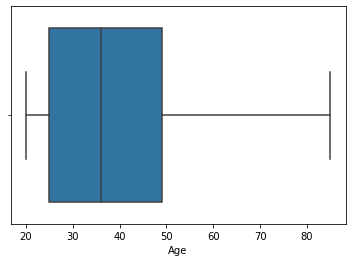

In [ ]:
#Age
Q1a = df['Age'].quantile(0.25)
Q2a = df['Age'].quantile(0.5)
Q3a = df['Age'].quantile(0.75)


#intervalo Interquartil(IQR)
#quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.
IQRa = Q3a - Q1a

print(f'Primeiro Quartil: ', Q1a)
print(f'Segundo Quartil: ', Q2a)
print(f'Terceiro Quartil: ', Q3a)
print(f'IQR: ', IQRa)

sns.boxplot(x=df['Age'])

Primeiro Quartil:  24405.0
Segundo Quartil:  31669.0
Terceiro Quartil:  39400.0
IQR:  14995.0


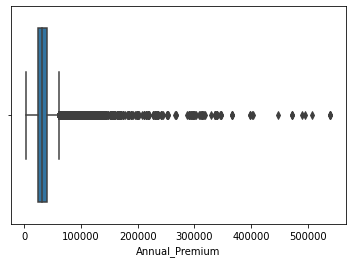

In [ ]:
#Annual_Premium
Q1ap = df['Annual_Premium'].quantile(0.25)
Q2ap = df['Annual_Premium'].quantile(0.5)
Q3ap = df['Annual_Premium'].quantile(0.75)

#intervalo Interquartil(IQR)
#quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.
IQRap = Q3ap - Q1ap

print(f'Primeiro Quartil: ', Q1ap)
print(f'Segundo Quartil: ', Q2ap)
print(f'Terceiro Quartil: ', Q3ap)
print(f'IQR: ', IQRap)

sns.boxplot(x=df['Annual_Premium'])
#Preciaremos investigar sobre os outliers neste atributo. Ver correlação com idade, sexo, previo sinistro, etc.

Primeiro Quartil:  82.0
Segundo Quartil:  154.0
Terceiro Quartil:  227.0
IQR:  145.0


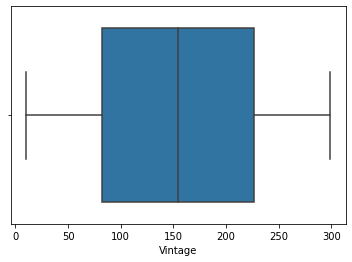

In [ ]:
#Vintage
Q1v = df['Vintage'].quantile(0.25)
Q2v = df['Vintage'].quantile(0.5)
Q3v = df['Vintage'].quantile(0.75)

#intervalo Interquartil(IQR)
#quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.
IQRv = Q3v - Q1v

print(f'Primeiro Quartil: ', Q1v)
print(f'Segundo Quartil: ', Q2v)
print(f'Terceiro Quartil: ', Q3v)
print(f'IQR: ', IQRv)

sns.boxplot(x=df['Vintage'])

In [ ]:
#Verificando a assimetria dos dados (distribuição dos dados em torno da média). 
assimetria= df.skew()
assimetria


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

In [ ]:
# A curtose nos ajuda a dar forma à distribuição dos dados
curtose= df.kurtosis()
curtose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


id                       -1.200000
Age                      -0.565655
Driving_License         464.354302
Region_Code              -0.867857
Previously_Insured       -1.971871
Annual_Premium           34.004569
Policy_Sales_Channel     -0.970810
Vintage                  -1.200688
Response                  3.298788
dtype: float64

In [ ]:
#Verificando os valores da classe.
df.Response.value_counts()
#Precisaremos trabalhar com o balanceamento das classes do dataset

0    334399
1     46710
Name: Response, dtype: int64

## Utilizando o sweetviz

In [ ]:
# #importando o arquvio de teste
# df_test = pd.read_csv("test.csv")
# df_test.sample(3)

In [ ]:
#Comparando os datasets de acordo com o guidebook do sweetviz
comparison_report = sv.compare([df,'Treino'], [df_test,'Teste'], target_feat='Response')

NameError: ignored

In [ ]:
comparison_report.show_notebook()

## Primeiros insights dos dados

# Respondendo as perguntas de negócio

In [ ]:
#Criando uma cópia do dataset
df_ = df.copy()

#Tratando os dados
"""
Gender: 0: Male, 1: Female
Vehicle_Age: 0: <1year, 1: 1-2years, 2: >2 anos
Vehicle_Damage: 0:No, 1:Yes
id: drop
"""


df_['Gender'] = df_['Gender'].replace({'Male': 0, 'Female': 1})
df_['Vehicle_Age'] = df_['Vehicle_Age'].replace({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})
df_['Vehicle_Damage'] = df_['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})
df_.drop(["id"], axis=1, inplace=True)
df_

### Quem é o nosso cliente?

In [ ]:
É uma empresa de seguro saúde que quer fazer venda casada com seguro veicular.

### Quem é o cliente do nosso cliente?


### Como poderíamos oferecer uma melhor experiencia ao público que não tiveram seguro veicular antes?

###  1. Qual o perfil dos clientes interessados no seguro de veículo

"""
1. Isolando as pessoas que tem interesse na variável "df_interested"
2. O total de interessados é de 46.710, com idade média de 43 anos. As mulheres representam 38.93% dos interessados.
3. Há um baixo interesse nos públicos entre 30 e 40 anos, e a partir dos 55 anos. O pico é entre os mais jovens de 20 a 30 anos.
4. a grande massa possui veiculo de 1 a 2 anos de idade.
5. Não fecham o ano fiscal de contrato

"""

In [ ]:
# Isolando os valores do atributo Response = 1

df_interested = df_[df_['Response']==1]
df_interested

In [ ]:
#Contagem de genero
gender_total = len(df_interested.Gender)
df_int_female= (df_interested['Gender'].loc[df_interested['Gender']==1].value_counts()/gender_total)*100
df_int_male= (df_interested['Gender'].loc[df_interested['Gender']==0].value_counts()/gender_total)*100

#idade média

df_int_age = df_interested.Age.mean()

#print("O total de interessados é de", gender_total, "que tem em média" ,df_int_age, "de idade. As mulheres representam" ,df_int_female, "e os homens,",df_int_male)
print(df_int_female)
print(df_int_male)


In [ ]:
#Visualizando a distribuição das idades dos interessados
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df_interested["Age"], color="#58CC99", kde=True, ax=ax)
ax.set_title("Distrituição das idades dos interessados no seguro veicular", fontsize= 16)
plt.xlabel("idade", fontsize=12)
plt.ylabel("Densidade (KDE)", fontsize=12)
plt.show()

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(y="Age", data=df_, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Idade",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("idade",fontdict= {'size':12})
plt.show()

In [ ]:
df_interested.hist(figsize=(20,20))

In [ ]:
df_.columns

In [ ]:
#Idade do carro dos interessados do seguro veicular
sns.set_style("white")
g = sns.catplot(x="Vehicle_Age", data=df_, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("idade do veículo",fontdict= {'size':12})
g.ax.yaxis.set_label_text("quantidade", fontdict= {'size':12})
g.ax.set_title("Idade do carro dos interessados do seguro veicular",fontdict= {'size':16})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [ ]:
def plot_count(x,fig):
    plt.subplot(6,2,fig)
    sns.countplot(df_[x],palette=("Blues_d"))
    plt.title(x+' Histogram', size=18)
    plt.ylabel('Count', size=18)

plt.figure(figsize=(15,20))

plot_count('Response', 1)
plot_count('Gender', 3)
plot_count('Driving_License', 5)
plot_count('Previously_Insured', 7)
plot_count('Vehicle_Age', 9)
plot_count('Vehicle_Damage', 11)

plt.tight_layout()

### 2 Qual a influência de cada feature (idade, genêro, localização, idade do veículo, teve dano anterior no veículo, prêmio, dentre outras) no interesse pelo seguro.

"""
_________
#colinha#: O coeficiente de correlação varia de -1 a 1. Quando está próximo de 1, significa que existe 
uma forte correlação positiva; por exemplo, o valor médio da habitação tende a aumentar 
quando a renda média aumenta. Quando o coeficiente está próximo de -1, significa que 
existe uma forte correlação negativa. Finalmente, coeficientes próximos de zero significam que não há 
correlação linear
_________


"""

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_interested.corr(), fmt='.2f', annot=True)
plt.title("Correlação entre as features")
plt.show()

### 3 Qual a percentagem de clientes tem interesse no seguro em relação ao total.<gráfico> 

"""

O percentual de interessados é de 12.26%

"""

In [ ]:
percentual = len(df_interested.Gender)/len(df_.Gender)*100
print(f'O percentual de interessados é de %.2f%%' %percentual)

### 4 Qual a distribuição da idade dos consumidores <grafico>

"""

Os clientes da seguradora de saúde estão em sua maioria na faixa dos 20 a 35 anos.

"""

In [ ]:
sns.distplot(df_.Age, bins=5, color='g')

### 5 Há relação entre o prêmio e a idade do cliente <gráfico> 

In [ ]:
sns.scatterplot(x="Annual_Premium", y="Age", hue="Response", data=df_)

### 6 Entre os gêneros, há diferença no interesse pelo seguro veicular <homens se interessam mais>

"""

Visualmente, nota-se que os mais interessados no seguro veicular são os homens

"""

In [ ]:
sns.countplot(x="Gender", hue="Response", data=df_, palette="rocket" )

### 7 Qual a quantidade de clientes tem habilitação (avaliar diferença por genêro) ****

In [ ]:
sns.countplot(x="Driving_License",hue="Gender", data=df_, palette="rocket" )

### 8 Qual a quantidade de clientes já teve seguro veicular.

"""

174.628 pessoas já tiveram seguro veicular

"""

In [ ]:
df_.Previously_Insured.value_counts()

### 9 A idade do veículo influência no interesse pelo seguro veicular.

In [ ]:
"""

Vehicle_Age: 0: <1year, 1: 1-2years, 2: >2 anos
Aparantemente, quem tem veículos de até dois anos de uso tem mais interesse no seguro veicular

"""

In [ ]:
sns.displot(df_interested.Vehicle_Age, bins=10, color="g")

### 10 Clientes que já tiveram seus veículos danificados têm mais propensão a adquirir o seguro veicular 

"""

sim. e homens sao mais interessados

"""

In [ ]:
danificados = df_interested["Vehicle_Damage"].value_counts()
print(danificados)
sns.countplot(x="Vehicle_Damage", data=df_interested
             )


In [ ]:
sns.pointplot(x="Gender", y="Vehicle_Damage" ,hue="Response", data=df_interested)

### 11 O número de dias que o cliente já é associado ao seguro de saúde (vintage) influência no interesse pelo seguro veicular.

"""

Não influencia

"""

In [ ]:
interessados = df_interested["Vintage"].mean()
geral=df_["Vintage"].mean()

print("A média geral de permanência no seguro é de ",geral, "e a média dos interessados é de ", interessados )
      

In [ ]:
sns.displot(x="Vintage", data=df_interested)
sns.displot(x="Vintage", data=df_)

### 12 Quais estratégias a empresa pode adotar para captar esses clientes com maior propensão à aceitação do seguro veicular. ****

"""

A squad precisará definir o persona/target do MVP para idear as estratégias de mercado

"""

### 13 Quais estratégias a empresa pode adotar para captar mais clientes.****

"""

A squad precisará definir o persona/target do MVP para idear as estratégias de mercado

"""

### 14 Como poderíamos melhorar a qualidade do serviço prestado pela seguradora de saúde?

### 15) Por que será que a empresa quer oferecer seguro veicular?

### 16) Poderíamos calcular a receita líquida da empresa com os valores apresentados? (fazendo algumas simulações?)

### 17) Explorar melhor a variável Annual_Premium

### 18) Será que as mulheres poderiam receber uma oferta de seguro veicular x saúde diferenciada? O que os dados mostram sobre isso?

### 19) Poderemos dar nomes para as variáveis dos atributos Region_Code e Policy_Sales_Channel para brincarmos um pouco mais com os dados?

In [ ]:
regiao= df["Region_Code"].value_counts()
regiao.sort_values()

In [ ]:
sns.countplot(x='Region_Code', data= df_, palette='Set1')

In [ ]:
canal= df["Policy_Sales_Channel"].value_counts()
canal.sort_values()
canal

In [ ]:
canal= df["Policy_Sales_Channel"].value_counts()
canal.sort_values()
canal
sns.countplot(x='Policy_Sales_Channel', data= df_, palette='Set1')

In [ ]:
df_interested.columns

# Criação do modelo e automação do processo

In [130]:
#Criando uma copia do dataset de treino 
df_train= df.copy()
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [131]:
#excluindo a coluna "id"
del df_train['id']
display(df_train)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [186]:
#importando bibliotecas
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree, svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer #Se necessário...
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [132]:
# Separando em X e y

X = df_train.drop('Response', axis = 1)
y = df_train['Response']

# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

# X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

## Cuidando do y

## Cuidando do X

In [136]:
#Fazendo uma cópia do X_treino
X_trat= X.copy()
X_trat

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74


In [137]:
#Verificando o tipo dos dados
X_trat.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [138]:
#Verificando o dataset
X_trat.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


### Tratando a coluna Region_Code

In [139]:
#Criando a coluna UF para receber Region_Code
X_trat["UF"]= "NaN"
X_trat.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,UF
88782,Female,42,1,33.0,0,1-2 Year,Yes,24809.0,124.0,211,NaN
169276,Male,42,1,28.0,0,1-2 Year,Yes,2630.0,158.0,50,NaN
31510,Male,37,1,28.0,1,1-2 Year,No,56697.0,13.0,158,NaN
372625,Male,51,1,28.0,0,1-2 Year,Yes,38629.0,26.0,245,NaN
152889,Male,22,1,28.0,1,< 1 Year,No,28463.0,152.0,127,NaN


In [140]:
#Carregando o arquivo com Region_Code e UF. Vamos utilizar apenas as colunas Region_Code e UF
#Valores baseados de acordo com dados da Frota Nacional(dezembro/2021) divulgado pelo Ministério da infraestrutura
#link: https://www.gov.br/infraestrutura/pt-br/assuntos/transito/conteudo-denatran/frota-de-veiculos-2021 

ufs = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Stack/UFs.xlsx")
regiao = ufs[["Region_Code", "UF"]]


In [141]:
#Vamos transformar o dataset em dicionários para podermos mapear com o dataset de treino
d =  dict([(i,a) for i,a in zip(regiao['Region_Code'], regiao['UF'])])
print(d)

{28.0: 'SP', 8.0: 'MG', 46.0: 'MG', 41.0: 'RJ', 15.0: 'RJ', 30.0: 'ES', 29.0: 'ES', 50.0: 'ES', 3.0: 'ES', 11.0: 'PR', 36.0: 'PR', 33.0: 'PR', 47.0: 'PR', 35.0: 'PR', 6.0: 'PR', 45.0: 'RS', 37.0: 'RS', 18.0: 'RS', 48.0: 'RS', 14.0: 'SC', 39.0: 'SC', 10.0: 'SC', 21.0: 'SC', 13.0: 'PI', 2.0: 'RN', 7.0: 'AL', 12.0: 'SE', 9.0: 'BA', 27.0: 'CE', 32.0: 'MA', 43.0: 'PB', 17.0: 'PE', 26.0: 'GO', 25.0: 'GO', 24.0: 'GO', 38.0: 'GO', 16.0: 'GO', 31.0: 'MT', 0.0: 'MT', 23.0: 'MT', 20.0: 'MT', 49.0: 'MS', 4.0: 'MS', 34.0: 'MS', 19.0: 'DF', 22.0: 'DF', 5.0: 'PA', 40.0: 'RO', 1.0: 'AM', 44.0: 'TO', 42.0: 'AC', 52.0: 'RR', 51.0: 'AP'}


In [142]:
#Usando a função .map para atribuir UF ao Region_Code
X_trat["UF"] = X_trat["Region_Code"].map(d)
X_trat

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,UF
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,SP
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,ES
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,SP
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,PR
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,RJ
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,GO
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,RS
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,ES
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,SC


### Tratando a coluna Policy_Sales_Channel

- Geração de leads: estratégias para conquistar possíveis compradores

[Materia exame](https://exame.com/invest/minhas-financas/como-escolher-a-melhor-franquia-para-o-seguro-do-seu-carro/)

[Pesquisa feita pela seguradora](https://www.revistaapolice.com.br/2021/09/seguro-automovel-maioria-dos-brasileiros-acha-produto-caro-e-pouco-acessivel/)

[O que é importante ter no seguro do automóvel?](https://www.seguroauto.org/importante-ter-no-seguro-de-automovel/)

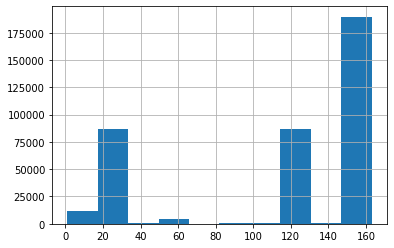

In [171]:
X_trat_channel = X_trat.copy()
X_trat_channel.Policy_Sales_Channel.hist()

In [145]:
X_trat_channel.Policy_Sales_Channel.value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [172]:
#Criando um mini-dicionario para alterar os valores de Policy_Sales_Channel
X_trat_channel['channel']=""
X_trat_channel['channel'] = X_trat_channel['Policy_Sales_Channel'].map({152.0:'Corretor',
                             26.0:'Corretor',
                             124.0:'Telefone',
                             160.0: 'Telefone',
                             156.0: "Outros",
                             " ": "outros"},
                             na_action=None)

X_trat_channel.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,UF,channel
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,SP,Corretor
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,ES,Corretor
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,SP,Corretor
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,PR,Corretor
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,RJ,Corretor


In [173]:
X_trat_channel.isnull().sum()

Gender                      0
Age                         0
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
UF                          0
channel                 60190
dtype: int64

In [174]:
#convertendo os valores nulos existentes como "Outros"
# atribuindo o valor a variável nuls e com a função fillna, imputar os dados faltantes
nulos = "Internet"
X_trat_channel.update(X_trat_channel['channel'].fillna(nulos))
X_trat_channel.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
UF                      0
channel                 0
dtype: int64

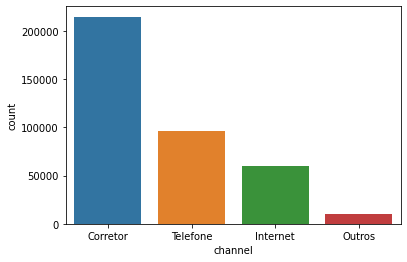

In [175]:
sns.countplot(x='channel', data=X_trat_channel)

## Excluindo as colunas tratadas

In [179]:
X_trat_channel.drop(["Region_Code", "Policy_Sales_Channel"], axis=1, inplace=True)
X_trat_channel.sample(1)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,UF,channel
13226,Male,42,1,0,1-2 Year,Yes,2630.0,157,SP,Internet


## Transfomando todas as colunas

In [180]:
#Separando as variáveis
variaveis_categoricas = [coluna for coluna in X_trat_channel.columns if X_trat_channel[coluna].dtype.name == 'object']
variaveis_categoricas

['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'UF', 'channel']

In [181]:
variaveis_numericas = [coluna for coluna in X_trat_channel.columns if coluna not in variaveis_categoricas]
variaveis_numericas

['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage']

In [183]:
# Separando tratamento para colunas categóricas (imputer = tratar dados faltantes)
pipeline_categoricas = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [184]:
# Tratamento para numéricas
pipeline_numericas = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [185]:
# 
pre_processamento = ColumnTransformer([
    ('cat', pipeline_categoricas, variaveis_categoricas),
    ('num', pipeline_numericas, variaveis_numericas)
])

### Separando os dados em treino e teste

In [187]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_trat_channel, y)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((285831, 10), (95278, 10), (285831,), (95278,))

In [188]:
#Criando as pipelines
pipeline_random_forest = make_pipeline(pre_processamento, RandomForestClassifier(random_state=42))
pipeline_log_reg = make_pipeline(pre_processamento, LogisticRegression(random_state=42))
pipeline_tree=make_pipeline(pre_processamento, tree.DecisionTreeClassifier(random_state=42))
pipeline_svm = make_pipeline(pre_processamento, svm.SVC(random_state=42))

In [189]:
#Estudando com o gridsearch para regressao logistica

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline_log_reg, param_grid, cv=10)
grid.fit(X_treino, y_treino)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.88
Best parameters:
{'logisticregression__C': 0.001}


## Testando os modelos preditivos

In [192]:
#Rodando o modelo Random Forest
pipeline_random_forest.fit(X_treino, y_treino)
pipeline_random_forest.score(X_teste, y_teste)

0.8631163542475703

In [190]:
#Rodando o modelo Regressão Logística
pipeline_log_reg.fit(X_treino, y_treino)
pipeline_log_reg.score(X_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8787128193287013

In [191]:
#Rodando o modelo Decision Tree
pipeline_tree.fit(X_treino, y_treino)
pipeline_tree.score(X_teste, y_teste)

0.8220890446902748

In [ ]:
#Rodando o modelo SVM
# nem rodou aqui...

pipeline_svm.fit(X_treino, y_treino)
pipeline_svm.score(X_teste, y_teste)

## Utilizando o cross validation

In [ ]:
validacao_cruzada = KFold(n_splits=10, shuffle=True, random_state=42)
validacao_cruzada

In [ ]:
#Verificando a acurácia média do Random Forest
acuracia_media_rf = cross_val_score(pipeline_random_forest, X, y, cv=validacao_cruzada).mean()
acuracia_media_rf

In [ ]:
#Verificando a acurácia média da Regressão Linear
acuracia_media_Lr= cross_val_score(pipeline_log_reg, X,y, cv=validacao_cruzada).mean()
acuracia_media_Lr

In [ ]:
#Verificando a acurácia média do Decisiom Tree
acuracia_media_tree= cross_val_score(pipeline_tree, X,y, cv=validacao_cruzada).mean()
acuracia_media_tree

In [ ]:
#Verificando a acurácia média do SVM
acuracia_media_svm= cross_val_score(pipeline_svm, X,y, cv=validacao_cruzada).mean()

# Apresentação do resultado